## 1(1) Competition&Data Information

### Import

In [1]:
import pandas as pd

### $\blacktriangleright$ Competition Information
- 대회를 통한 궁극적인 목표는 제주도 유동인구가 늘어나 생긴 `제주도 내 교통 정체(체증) 구간`을 예측하고자 한다. 
- 출발지점에서 도착지점까지 걸리는 `평균속도(km/h)`를 예측하며 평가지표는 MAE이다.<br>
  $$\large MAE = \frac{1}{\LARGE n} \underset{i=1}{\overset{n}{\sum}} |\hat{y_i} - y_i|$$
- Dacon은 Data Leakage에 굉장히 민감하여 Test와 관련된 모든 정보는 유의해야 한다.<br>
  Categorical Encoding시 one-hot(pd.get_dummies) 등 Test 내 예상하지 못한 값, 예상한 값이나 발생하지 않는 경우를 고려하지 못하는 방법은 사용하지 말아야 한다.
- 22.11.14(10:00)에 대회가 종료되며 최종파일로 2개를 선택해 채점된다.
- 상위 10개의 팀에 대해 각 팀별 예측 결과 활용방안을 발표해 최종 순위가 결정된다. 

- 유사대회
  - [Kaggle] https://www.kaggle.com/code/xown3197/code-traffic
    - 유동인구, 강수량, 풍속 등의 변수가 유의미하게 작용할 것이다.
    - Test기간을 사용하면 안됨으로 전년동월 데이터를 사용하는 등의 방법을 취해야 한다.
  - [Kaggle] https://www.kaggle.com/competitions/2021-ai-termproject-19011827
    - 기온, 강수량, 7시와 20시 교통량의 변수가 유의미하게 작용할 것이다.
    - 수집과 Test기간을 고려해야 한다.
  - `[Kaggle]` https://www.kaggle.com/code/dowaari/taxi-trip-duration-v1
    - 위경도 변환 등 유용한 변수가 많다. 모두 시도해보고 제주특별자치도의 특성에 맞게 다른 방법도 고려해본다.

### $\blacktriangleright$ Define Data
- Datetime Variable
  - base_date
- Categorical Variable
  - Multiclass
    - day_of_week, base_hour
    - connect_code
    - maximum_speed_limit
    - weight_restricted, hight_restricted
    - road_name, road_type, road_rating
    - start_node_name, end_node_name
    - vehicle_restricted
  - Binary
    - road_in_use
    - multi_linked
    - start_turn_restricted, end_turn_restricted
- Numeric Variable
  - lane_count
  - start_latitude, start_longitude
  - end_latitude, end_longitude
- `Target`<br>
  :출발부터 도착까지의 평균 속력
  - 정체 구간 정보
  - 내비게이션 총 거리, 평균 소요 시간

In [2]:
display(pd.read_csv('data_info.csv'))

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


### $\blacktriangleright$ Out Data
- 사용에 법적 제약이 없고 누구나 사용할 수 있는 외부 데이터이며 Test시점이 아닌 2022년 8월 이전 데이터만 사용가능하다.
- API를 사용할 경우 누구나 사용할 수 있으며 호출 횟수에 대한 제약이 없어야 사용할 수 있다.

- [Jejudatahub] 프로젝트에 담아두었다.
- [제주도 도로별 속도] http://www.jejuits.go.kr/road_statistics/road_statisticsView.do
  - Target과 유사한 데이터이나 일별 수집해야한다.
- [제주도 일일 전력량] https://www.data.go.kr/data/15065239/fileData.do
  - 2020 ~ 2022.08까지 일별 시간대 전력량 데이터이다.
  - 제주도 내 해당 일 시간대에 머문 인구를 대변할 수 있다.
- [제주도 위경도 정보] https://www.data.go.kr/data/15004770/fileData.do
  - 2015.12.31.시점 제주도 내 모든 장소의 위경도 좌표를 담은 데이터이다.
  - 데이터 내 위경도 좌표로부터 읍면동, 건물정보, 특성 등의 정보를 추출할 수 있다.
- [제주도 버스 시간표] http://bus.jeju.go.kr/publicTrafficInformation/generalBusSchedule?viewtype=2
  - 정류장 간 소요시간을 산출할 수 있다.
  - 노선별로 수집해야 하며 정류장 이름으로 Geocoding해야 한다.
- [제주도 사고다발 데이터] https://www.jejudatahub.net/data/view/data/863
  - 2017.01.01. ~ 2020.12.31. 동안 동별 사고 발생 데이터이다.

In [ ]:
# https://www.data.go.kr/data/15075838/openapi.do
# https://www.data.go.kr/data/15099715/openapi.do

### $\blacktriangleright$ EDA

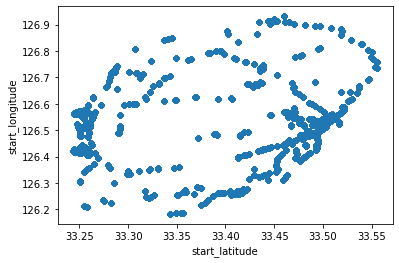

In [6]:
train[['start_latitude','start_longitude']].plot.scatter(x='start_latitude',y='start_longitude')
plt.show()

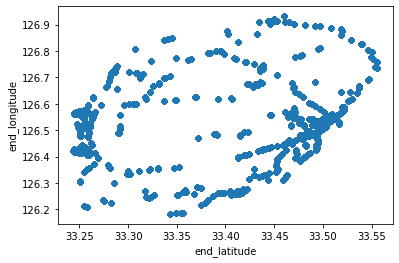

In [8]:
train[['end_latitude','end_longitude']].plot.scatter(x='end_latitude',y='end_longitude')
plt.show()